In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"file:///C:\Users\Computech\Desktop\intellipaat handson\DataFrames\combined_data_1.txt", names=["cust_id", "rating"], header= None, usecols=(0,1)) 

In [4]:
df.shape

(24058263, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust_id  object 
 1   rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [6]:
print("all the null value in the rating represent the row marking the nulls_s of the following rows")
df.isnull().sum()

all the null value in the rating represent the row marking the nulls_s of the following rows


cust_id       0
rating     4499
dtype: int64

In [7]:
# df.head(550)

#### Data Processing

In [8]:
nulls_s = df[df["rating"].isnull() == True]

In [9]:
nulls_s.drop("rating", axis = True, inplace= True)

In [10]:
nulls_s.reset_index(inplace= True)

In [11]:
nulls_s.drop("cust_id", axis=1, inplace= True)

In [12]:
nulls_s.columns= ["starts"]

In [13]:
z = list(zip(nulls_s.starts, nulls_s.starts[1:]))

In [14]:
movie_id = []
id = 1
for i, j in z:
    temp = np.full((1,j-i),id)
    movie_id = np.append(movie_id,temp)
    id+=1

last_movie = np.full((1,len(df)-j), id)
movie_id = np.append(movie_id, last_movie)

In [15]:
df['movie_id'] = movie_id.astype("int")

In [16]:
df0 = df

In [17]:
df0 = df0[pd.notnull(df0["rating"])]

In [18]:
df0

,cust_id,rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [19]:
df0["cust_id"] = df0["cust_id"].astype("int")

In [20]:
df0.dtypes

cust_id       int32
rating      float64
movie_id      int32
dtype: object

In [21]:
df0.shape

(24053764, 3)

#### Removing movies with low no.of.ratings out of recommendation system 

In [22]:
df0.describe()

,cust_id,rating,movie_id
count,2.405376e+07,2.405376e+07,2.405376e+07
mean,1.322285e+06,3.599634e+00,2.308324e+03
std,7.645779e+05,1.086118e+00,1.303909e+03
min,6.000000e+00,1.000000e+00,1.000000e+00
25%,6.609270e+05,3.000000e+00,1.180000e+03
50%,1.318602e+06,4.000000e+00,2.342000e+03
75%,1.984358e+06,4.000000e+00,3.433000e+03
max,2.649429e+06,5.000000e+00,4.499000e+03


In [23]:
func = ["count"]
df0_movie_id = df0.groupby("movie_id")["rating"].agg(func)

In [24]:
df0_movie_id.describe()

,count
count,4499.000000
mean,5346.468993
std,16176.313851
min,36.000000
25%,192.000000
50%,552.000000
75%,2538.000000
max,193941.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x263000b2d10>,
 'caps': [<matplotlib.lines.Line2D at 0x2637b671f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2630008d690>],
 'medians': [<matplotlib.lines.Line2D at 0x263000bded0>],
 'fliers': [<matplotlib.lines.Line2D at 0x263000be8d0>],
 'means': []}

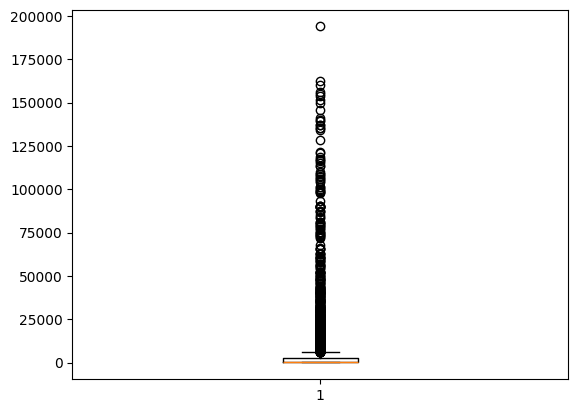

In [25]:
plt.boxplot(df0_movie_id)

In [26]:
movie_benchmark = round(df0_movie_id.quantile(0.7),0)
movie_benchmark = int(movie_benchmark)
movie_benchmark

1799

In [27]:
df0_movie_id

,count
movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [28]:
movie_id_drop = df0_movie_id[df0_movie_id["count"] < movie_benchmark].index

In [29]:
movie_id_drop

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='movie_id', length=3149)

In [30]:
df0_cust_id = df0.groupby("cust_id")["rating"].agg(func)

In [31]:
cust_benchmark = round(df0_cust_id.quantile(0.7),0)
cust_benchmark = int(cust_benchmark)
cust_benchmark

52

In [32]:
cust_id_drop = df0_cust_id[df0_cust_id["count"] < cust_benchmark].index

In [33]:
cust_id_drop

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='cust_id', length=327300)

In [34]:
df0 = df0[~df0["movie_id"].isin(movie_id_drop)]
df0 = df0[~df0["cust_id"].isin(cust_id_drop)]

In [35]:
df0

,cust_id,rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496


### Pivot Table 

In [36]:
df_p = pd.pivot_table(data= df0, index= "cust_id", values= "rating", columns= "movie_id")

#### Importing the movie titles `

In [37]:
df0_title = pd.read_csv(r"file:///C:\Users\Computech\Desktop\intellipaat handson\DataFrames\movie_titles _1_ (2).csv", usecols=(0,1,2), names= ["movie_id", "year", "title"], encoding= "ISO-8859-1")

In [38]:
df0_title.set_index("movie_id", inplace= True)
df0_title

,year,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


#### Building The Model

In [39]:
import math
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [40]:
reader = Reader()
dataset = Dataset.load_from_df(df0[["cust_id", "movie_id", "rating"]], reader)

In [41]:
svd = SVD()

In [42]:
# cross_validate(svd, dataset, measures=['rmse', 'mae'], cv=3, verbose= True)

In [43]:
user_712664 = df0_title.reset_index().copy()
user_712664

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [44]:
user_712664 = user_712664[~user_712664["movie_id"].isin(movie_id_drop)]
user_1055714 = user_712664.copy()

In [45]:
trainset = dataset.build_full_trainset()
svd.fit(trainset)

In [56]:
user_712664["estimate_score"] = user_712664["movie_id"].apply(lambda x: svd.predict(712664, x).est)

In [57]:
user_712664
# .drop("movie_id", axis= 1, inplace= True)

,movie_id,year,title,estimate_score
4426,4427,2001.0,The West Wing: Season 3,4.924122
3455,3456,2004.0,Lost: Season 1,4.744927
2451,2452,2001.0,Lord of the Rings: The Fellowship of the Ring,4.555634
2113,2114,2002.0,Firefly,4.841268
2404,2405,2003.0,MI-5: Vol. 2,4.703864
...,...,...,...,...
2275,2276,1998.0,Spice World,1.220285
1362,1363,1993.0,Leprechaun,2.116167
2474,2475,1993.0,Jason Goes to Hell,1.890620
748,749,1990.0,Ernest Goes to Jail,1.812945


In [59]:
user_712664 = user_712664.sort_values("estimate_score", ascending= False)
user_712664.head(10)

,movie_id,year,title,estimate_score
871,872,1954.0,Seven Samurai,5.0
3443,3444,2004.0,Family Guy: Freakin' Sweet Collection,5.0
2171,2172,1991.0,The Simpsons: Season 3,5.0
995,996,1961.0,Yojimbo,5.0
4114,4115,1999.0,The Simpsons: Bart Wars,5.0
174,175,1992.0,Reservoir Dogs,5.0
3289,3290,1974.0,The Godfather,5.0
773,774,2003.0,Foyle's War: Set 2,5.0
4352,4353,2002.0,Curb Your Enthusiasm: Season 3,5.0
721,722,2003.0,The Wire: Season 1,5.0


#### Checking for difference between my dataset and teach dataset

In [49]:
# df0

In [50]:
# df0t = df0.reset_index()
# # df0t.drop("index", axis= 1, inplace= True)

In [51]:
# df0i = pd.read_csv(r"file:///C:\Users\Computech\Desktop\intellipaat handson\MyCodes\net_data")

In [52]:
# df0i.columns = df0.columns

In [53]:
# df0i

In [54]:
# diff = pd.concat([df0i, df0]).drop_duplicates(keep= False)

In [55]:
# diff0 = df0t != df0i